#### Quick look at the data

In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
from argopy import DataFetcher as ArgoDataFetcher

In [2]:
plt.rc('font', size=12)

### Argo data

Tried to load in some Argo data to have a look at but this method did not seem to work.

In [3]:
argo_loader = ArgoDataFetcher()
latmin, latmax = -60, -45
lonmin, lonmax = -180, 180
pressure_min, pressure_max = 0, 10

In [4]:
# ds_argo = argo_loader.region([lonmin, lonmax, latmin, latmax, pressure_min, pressure_max, '2019-01', '2019-02']).to_xarray()

### Saildrone data

Circumpolar track around the Southern Ocean from 2019.

In [5]:
# TO DO: Upload ADCP data file and load that in too

In [6]:
# file = '~/OHW22_proj_front_finder/data/saildrones/saildrone-gen_5-antarctica_circumnavigation_2019-sd1020-20190119T040000-20190803T043000-1440_minutes-v1.1620361814756.nc'

In [7]:
ds_saildrone = xr.open_mfdataset("~/shared/antarctic_sd_data/saildrone-gen_5-antarctica_circumnavigation_2019-sd1020-20190119T040000-20190803T043000-1_minutes-v1.1620360815446.nc", chunks='auto')

In [8]:
variables = [
    'TEMP_CTD_RBR_STDDEV',
    'TEMP_CTD_RBR_MEAN',
    'SAL_RBR_MEAN',
    'SAL_RBR_STDDEV',
    'O2_CONC_AANDERAA_MEAN',
    'O2_CONC_AANDERAA_STDDEV',
    'CHLOR_RBR_MEAN',
    'CHLOR_RBR_STDDEV']

df = ds_saildrone[variables].to_dataframe() # moving to dataframe (easier)

In [9]:
df.index = df.index.droplevel(0) # getting rid of trajectory info

In [10]:
df = df.set_index('time', drop=False)
df

,TEMP_CTD_RBR_STDDEV,TEMP_CTD_RBR_MEAN,SAL_RBR_MEAN,SAL_RBR_STDDEV,O2_CONC_AANDERAA_MEAN,O2_CONC_AANDERAA_STDDEV,CHLOR_RBR_MEAN,CHLOR_RBR_STDDEV,latitude,longitude,time
time,,,,,,,,,,,
2019-01-19 04:00:00,0.002,15.680,34.656,0.003,292.99,0.64,1.5053,0.0268,-46.683142,168.517056,2019-01-19 04:00:00
2019-01-19 04:01:00,0.002,15.671,34.676,0.002,293.06,0.04,1.5336,0.1127,-46.683686,168.518438,2019-01-19 04:01:00
2019-01-19 04:02:00,0.003,15.683,34.668,0.003,292.71,0.05,1.4532,0.0275,-46.684218,168.519962,2019-01-19 04:02:00
2019-01-19 04:03:00,0.003,15.689,34.664,0.004,292.61,0.04,1.4437,0.0430,-46.684675,168.521280,2019-01-19 04:03:00
2019-01-19 04:04:00,0.003,15.688,34.679,0.003,292.56,0.05,1.3903,0.0465,-46.685165,168.522586,2019-01-19 04:04:00
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-03 04:26:00,0.010,9.883,33.416,0.021,328.40,0.08,77.0648,2.8832,-46.604157,168.361498,2019-08-03 04:26:00
2019-08-03 04:27:00,0.005,9.879,33.423,0.019,328.54,0.07,36.2703,3.0169,-46.602474,168.359770,2019-08-03 04:27:00
2019-08-03 04:28:00,0.003,9.882,33.424,0.016,328.83,0.06,99.6159,3.3730,-46.601005,168.357760,2019-08-03 04:28:00


In [11]:
resample_to = '5Min'

df = df.resample(resample_to).agg(
    dict(
        TEMP_CTD_RBR_STDDEV='mean',
        TEMP_CTD_RBR_MEAN='mean',
        SAL_RBR_MEAN='mean',
        SAL_RBR_STDDEV='mean',
        O2_CONC_AANDERAA_MEAN='mean',
        O2_CONC_AANDERAA_STDDEV='mean',
        CHLOR_RBR_MEAN='mean',
        CHLOR_RBR_STDDEV='mean',
        latitude='last',
        longitude='last',
        time='last'
    )
)

In [12]:
df

,TEMP_CTD_RBR_STDDEV,TEMP_CTD_RBR_MEAN,SAL_RBR_MEAN,SAL_RBR_STDDEV,O2_CONC_AANDERAA_MEAN,O2_CONC_AANDERAA_STDDEV,CHLOR_RBR_MEAN,CHLOR_RBR_STDDEV,latitude,longitude,time
time,,,,,,,,,,,
2019-01-19 04:00:00,0.0026,15.6822,34.6686,0.0030,292.786,0.164,1.46522,0.05130,-46.685165,168.522586,2019-01-19 04:04:00
2019-01-19 04:05:00,0.0032,15.7156,34.6794,0.0062,292.568,0.048,1.31428,0.03932,-46.687046,168.530394,2019-01-19 04:09:00
2019-01-19 04:10:00,0.0022,15.7794,34.6486,0.0296,291.408,0.116,1.26592,0.06722,-46.688685,168.537523,2019-01-19 04:14:00
2019-01-19 04:15:00,0.0024,15.8604,34.6292,0.0024,291.002,0.098,1.43550,0.03076,-46.690166,168.544742,2019-01-19 04:19:00
2019-01-19 04:20:00,0.0026,15.9410,34.6122,0.0020,290.698,0.096,1.60544,0.03764,-46.691709,168.551846,2019-01-19 04:24:00
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-03 04:10:00,0.0038,9.8442,33.4098,0.0206,327.650,0.094,81.15500,7.27760,-46.624915,168.352640,2019-08-03 04:14:00
2019-08-03 04:15:00,0.0032,9.7888,33.3326,0.0092,328.862,0.282,51.96872,5.09622,-46.617456,168.359910,2019-08-03 04:19:00
2019-08-03 04:20:00,0.0050,9.8382,33.3586,0.0136,328.540,0.088,38.04586,5.95124,-46.608282,168.362445,2019-08-03 04:24:00


In [13]:
gdf = gpd.GeoDataFrame(data=df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='4326')

In [14]:


non_valid_geom = gdf.geometry.apply(isnullgeometry)
print('count of invalid geometries ' + str(non_valid_geom.sum()))


count of invalid geometries 4776


<AxesSubplot:>

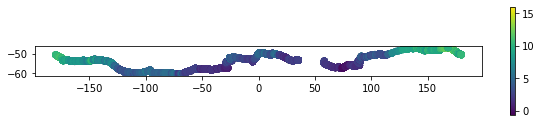

In [15]:
gdf.plot(column='TEMP_CTD_RBR_MEAN', figsize=(10, 2), legend=True)

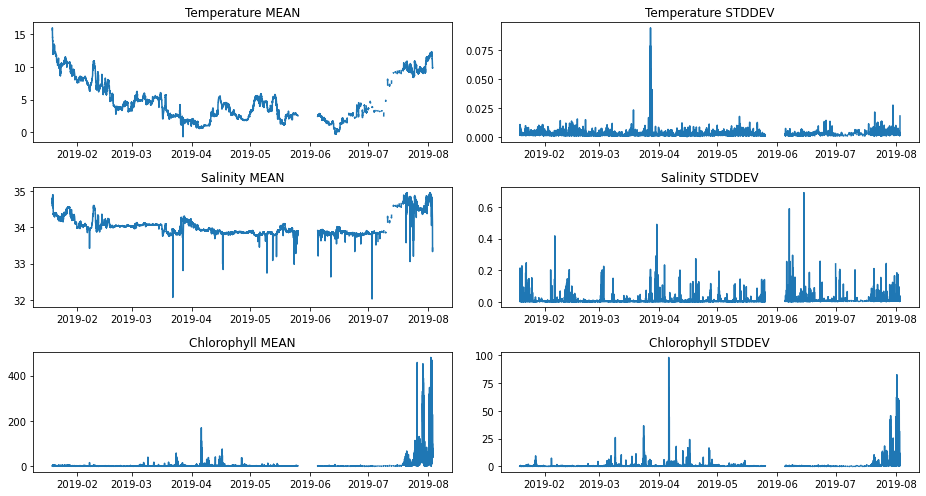

In [16]:
# Some timeseries plots to have a look at the data 

fig, axs = plt.subplots(3, 2, figsize = (13,7))
axs = axs.flatten()

axs[0].plot(df.time, df.TEMP_CTD_RBR_MEAN)
axs[0].set_title('Temperature MEAN')

axs[1].plot(df.time, df.TEMP_CTD_RBR_STDDEV)
axs[1].set_title('Temperature STDDEV')

axs[2].plot(df.time, df.SAL_RBR_MEAN)
axs[2].set_title('Salinity MEAN')

axs[3].plot(df.time, df.SAL_RBR_STDDEV)
axs[3].set_title('Salinity STDDEV')

axs[4].plot(df.time, df.CHLOR_RBR_MEAN)
axs[4].set_title('Chlorophyll MEAN')

axs[5].plot(df.time, df.CHLOR_RBR_STDDEV)
axs[5].set_title('Chlorophyll STDDEV')

plt.tight_layout(h_pad = 1.2)